This section is to answer the first subquestion "What are the common types of tags used by science fiction readers on the Goodreads website?"

Howerver, “the common types of tags” is a very general concept, so we decided to separate the first subquestion into four smaller questions, which are:
(1) How many tags do reviewers prefer to choose to describe a science fiction?
(2) What length tags do readers usually to mark science fiction?
(3) Which lexicality is most common in labels? nouns? verbs? or adjectives?
(4)What topics do these labels usually cover?

In this section, we only show a summary of the results. For detailed conclusions and discussions, please refer to the results section of the paper.

### **Q1:How many tags do reviewers prefer to choose to describe a science fiction?**

A reviewer adds tags to a science fiction, and the tag data is stored in the "Tags" column of the CSV file. Therefore, we need to extract the "Tags" column first, and then calculate the number of tags in each row of the "Tags" column.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# import required libraries
import os
import pandas as pd
import csv

We extract the "Tags" column and store it in a new CSV file, which improves the efficiency of subsequent data processing. Due to the large amount of data in this case, it would be a waste of time to read and process the original CSV file each time.

Please pay attention that the following code can be reused by simply replacing the folder path.



In [ ]:
# Specify the path to the folder containing the CSV files
folder_path = "/Users/wanshuo/Desktop/Master/DH_MA_thesis/scrape_metadata_and_reviews/reviews/page_5_reviews/"

# List all files in the folder that end with .csv
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Iterate over each CSV file
for csv_file in csv_files:
    # Construct the full path to the CSV file
    file_path = os.path.join(folder_path, csv_file)

    # Read the content of the CSV file into a DataFrame, assuming the first row is the header
    data = pd.read_csv(file_path, header=0)

    # Filter the DataFrame to include only rows where the 'Tags' column is not empty
    non_empty_tags = data[data['Tags'].notna()]

    # Extract the 'Tags' column from the filtered DataFrame
    tags_column = non_empty_tags['Tags']

    # Calculate the number of tags in each row's 'Tags' column, and create a new column 'Tag_Count' to store the results
    non_empty_tags.loc[:, 'Tag_Count'] = tags_column.apply(lambda x: len(x.split('；')))

    # Construct the output file name by removing the file extension and adding '_tag_count.csv'
    output_file = os.path.splitext(csv_file)[0] + '_tag_count.csv'

    # Open the output file in write mode with newline character mode
    with open(output_file, mode='w', newline='') as file:
        # Define the column names for the CSV file
        fieldnames = ['Row', 'Tags', 'Tag_Count']

        # Create a DictWriter object to write dictionaries to the CSV file
        writer = csv.DictWriter(file, fieldnames=fieldnames)

        # Write the header to the CSV file
        writer.writeheader()

        # Iterate over each row in the filtered DataFrame
        for index, row in non_empty_tags.iterrows():
            # Write each row's data to the CSV file, including row index, tags, and tag count
            writer.writerow({'Row': index, 'Tags': row['Tags'], 'Tag_Count': row['Tag_Count']})


Finally, the number of tags is counted and a bar graph is plotted. The results of the statistics can help us answer the question "How many tags do reviewers prefer to choose to describe a science fiction?”.

In [ ]:
# import required libraries
import os
import pandas as pd
import matplotlib.pyplot as plt

3    13239
1    12062
2     6469
Name: Tag_Count, dtype: int64


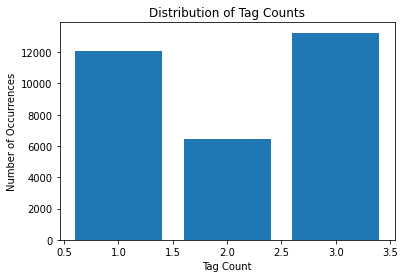

In [ ]:
# List of folder paths containing the CSV files
folder_paths = [
    "/Users/wanshuo/Desktop/Master/DH_MA_thesis/scrape_metadata_and_reviews/tags/Page_1_tags",
    "/Users/wanshuo/Desktop/Master/DH_MA_thesis/scrape_metadata_and_reviews/tags/Page_2_tags",
    "/Users/wanshuo/Desktop/Master/DH_MA_thesis/scrape_metadata_and_reviews/tags/Page_3_tags",
    "/Users/wanshuo/Desktop/Master/DH_MA_thesis/scrape_metadata_and_reviews/tags/Page_4_tags",
    "/Users/wanshuo/Desktop/Master/DH_MA_thesis/scrape_metadata_and_reviews/tags/Page_5_tags"
]

# Create an empty DataFrame to store combined data
combined_data = pd.DataFrame()

# Iterate over each folder path
for folder_path in folder_paths:
    # List all CSV files in the current folder
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

    # Iterate over each CSV file in the current folder
    for csv_file in csv_files:
        # Construct the full path to the CSV file
        file_path = os.path.join(folder_path, csv_file)

        # Read the content of the CSV file into a DataFrame, assuming the first row is the header
        data = pd.read_csv(file_path, header=0)

        # Concatenate the data from the current CSV file to the combined DataFrame
        combined_data = pd.concat([combined_data, data], ignore_index=True)

# Calculate the frequency of each 'Tag_Count' value in the combined DataFrame
tag_count_counts = combined_data['Tag_Count'].value_counts()

# Print the frequency of each 'Tag_Count' value
print(tag_count_counts)

# Plot the distribution of 'Tag_Count' values as a bar chart
plt.bar(tag_count_counts.index, tag_count_counts.values)
plt.xlabel('Tag Count') # Label for the x-axis
plt.ylabel('Number of Occurrences') # Label for the y-axis
plt.title('Distribution of Tag Counts') # Title of the plot
plt.show() # Display the plot


### **Q2: What length tags do readers usually to mark a science fiction?**

In our study, all tags consist of English letters or English letters and hyphens. We need to calculate the length of each tag. For instance, the label "best-of-2023" is a string consisting of the characters 'b', 'e', 's', 't', '-', 'o', 'f', '-', '2', '0', '2', '3', and the length is 12. Then the frequency of occurrence of each label length is calculated. Finally, the distribution of tag lengths is visualised to help analyse the question "What length tags do readers usually to mark a science fiction?"

In [ ]:
# import required libraries
import os
import pandas as pd
import matplotlib.pyplot as plt

Tag Lengths and their Frequencies:
7     3557
9     2649
4     1829
10    1630
13    1477
5     1276
12    1237
6     1160
15     993
11     875
3      843
14     791
16     662
8      649
17     549
18     538
20     321
19     307
21     220
22     216
23     188
24     146
25     133
2      114
26     111
29      82
27      73
34      54
28      50
30      47
33      36
31      36
32      32
35      31
1        9
dtype: int64


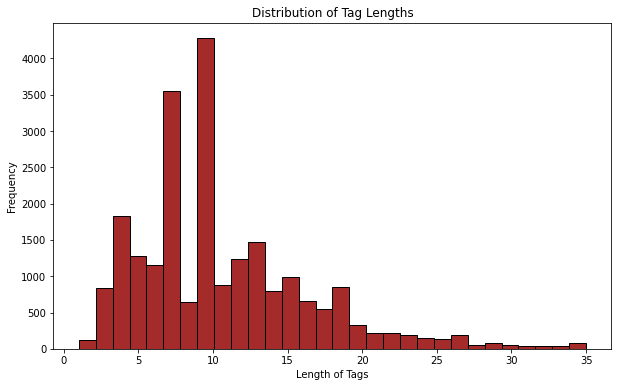

In [ ]:
# Define a list of folder paths where the CSV files with tags are stored
# This list specifies multiple directories to ensure all relevant files are included
folder_paths = [
    "/Users/wanshuo/Desktop/Master/DH_MA_thesis/scrape_metadata_and_reviews/tags/Page_1_tags",
    "/Users/wanshuo/Desktop/Master/DH_MA_thesis/scrape_metadata_and_reviews/tags/Page_2_tags",
    "/Users/wanshuo/Desktop/Master/DH_MA_thesis/scrape_metadata_and_reviews/tags/Page_3_tags",
    "/Users/wanshuo/Desktop/Master/DH_MA_thesis/scrape_metadata_and_reviews/tags/Page_4_tags",
    "/Users/wanshuo/Desktop/Master/DH_MA_thesis/scrape_metadata_and_reviews/tags/Page_5_tags"
]

# Initialize an empty list to store the lengths of tags
# This list will be used to accumulate the length of each individual tag
tag_lengths = []

# Iterate over each file in the current folder
for file_name in os.listdir(folder_path):
    # Check if the current file has a .csv extension
    # Only process files with a .csv extension to avoid other file types
    if file_name.endswith('.csv'):
        # Construct the full file path
        # This provides the complete path to the file for reading
        file_path = os.path.join(folder_path, file_name)

        # Read the CSV file into a DataFrame
        # This reads the CSV content into a pandas DataFrame for easier manipulation
        data = pd.read_csv(file_path)

        # Iterate over each cell in the 'Tags' column
        for tags_cell in data['Tags']:
            # Split the cell content into individual tags using '；' as the delimiter
            # This separates the tags which are concatenated with '；'
            tags_list = tags_cell.split('；')
            # Iterate over each tag in the list
            for tag in tags_list:
                # Append the length of the current tag to the tag_lengths list
                # This records the length of each tag to analyze their distribution later
                tag_lengths.append(len(tag))

# Create a Series from the tag lengths and count the occurrences of each length
# This creates a frequency distribution of tag lengths
tag_length_counts = pd.Series(tag_lengths).value_counts()
# Print the tag lengths and their frequencies
# Output the frequency distribution for inspection
print("Tag Lengths and their Frequencies:")
print(tag_length_counts)

# Create a new figure for the histogram
# This sets up the dimensions of the plot
plt.figure(figsize=(10, 6))

# Plot a histogram of the tag lengths
# This generates the histogram with specified bin size and color settings
plt.hist(tag_lengths, bins=30, color='brown', edgecolor='black')
# Set the label for the x-axis
# This labels the x-axis to indicate it represents tag lengths
plt.xlabel('Length of Tags')
# Set the label for the y-axis
# This labels the y-axis to indicate it represents the frequency of tag lengths
plt.ylabel('Frequency')
# Set the title of the plot
# This provides a title to summarize the content of the plot
plt.title('Distribution of Tag Lengths')
# Display the plot
# This renders the plot so it can be viewed
plt.show()


### **Q3:Which lexical term is most common in labels? nouns? verbs? or adjectives?**

Before running the code, make sure you have installed the spaCy library. spaCy is a powerful natural language processing library used for a variety of text analysis tasks (spaCy, n.d.). If you want to know more about spaCy, you can refer to https://spacy.io/

If you have not installed spaCy yet, you can do so with the command:
**!pip install spacy**.

After installing the spaCy library, you will also need to download a language model, as spaCy uses pre-trained language models for text analysis. For English text, the **en_core_web_sm** model is usually used, which is enough for the majority text processing tasks.

In [ ]:
#Install the spaCy library
!pip install spacy==3.5.2

  Using cached spacy-3.5.2-cp38-cp38-macosx_10_9_x86_64.whl (6.8 MB)
  Using cached thinc-8.1.12-cp38-cp38-macosx_10_9_x86_64.whl (857 kB)
     |████████████████████████████████| 2.9 MB 1.7 MB/s eta 0:00:01
  Using cached typer-0.7.0-py3-none-any.whl (38 kB)
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.7.1
    Uninstalling pydantic-2.7.1:
      Successfully uninstalled pydantic-2.7.1
  Attempting uninstall: typer
    Found existing installation: typer 0.12.3
    Uninstalling typer-0.12.3:
      Successfully uninstalled typer-0.12.3
  Attempting uninstall: thinc
    Found existing installation: thinc 8.2.3
    Uninstalling thinc-8.2.3:
      Successfully uninstalled thinc-8.2.3
  Attempting uninstall: spacy
    Found existing installation: spacy 3.7.4
    Uninstalling spacy-3.7.4:
      Successfully uninstalled spacy-3.7.4


In [ ]:
# Install English language model
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.8 MB 3.1 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
# import required libraries
import os
import pandas as pd
import spacy

Through observation, we noticed that many tags are repeated as readers may have referred to tags from previous reviewers. In order to reduce the workload and avoid repeating efforts, we need to count the frequency of tag first.

The following code can be reused by simply replacing the folder path.

In [ ]:
# Specify the folder path where the CSV files are located
# This sets the directory to search for CSV files containing tag data
folder_path = "/content/drive/MyDrive/Page_5_tags"

# Initialize an empty DataFrame to store the results
# This DataFrame will be used to accumulate the frequency of tags across multiple files
result_df = pd.DataFrame()

# Iterate over each file in the specified folder
for file_name in os.listdir(folder_path):
    # Check if the file is a CSV file
    # Only process files with a .csv extension to avoid non-CSV files
    if file_name.endswith('.csv'):
        # Construct the full file path
        # This provides the complete path to the file for reading
        file_path = os.path.join(folder_path, file_name)

        # Read the CSV file into a DataFrame
        # This reads the CSV content into a pandas DataFrame for easier manipulation
        data = pd.read_csv(file_path)

        # Initialize a list to store all tags from the current file
        # This list will be used to collect all tags from the 'Tags' column
        all_tags = []

        # Iterate over each cell in the 'Tags' column
        for tags_cell in data['Tags']:
            # Check if the cell is a string (not NaN or other types)
            # Only process cells that contain string data
            if isinstance(tags_cell, str):
                # Split the cell content into individual tags using '；' as the delimiter
                # This separates the tags which are concatenated with '；'
                tags_list = tags_cell.split('；')
                # Extend the all_tags list with the tags from the current cell
                # This adds the tags to the list for further processing
                all_tags.extend(tags_list)
            else:
                # Skip cells that do not contain strings
                # This ensures only valid tag data is processed
                continue

        # Create a DataFrame from the list of tags
        # This converts the list of tags into a DataFrame for easier frequency calculation
        tags_df = pd.DataFrame(all_tags, columns=['Tag'])

        # Calculate the frequency of each tag
        # This groups the tags by their value and counts the occurrences of each tag
        tags_freq = tags_df.groupby('Tag').size().reset_index(name='Frequency')

        # Concatenate the current file's tag frequencies with the result DataFrame
        # This accumulates the tag frequencies from all files into a single DataFrame
        result_df = pd.concat([result_df, tags_freq], ignore_index=True)

# Group by tag and sum the frequencies to get the final result
# This combines the frequencies of the same tags across all files
final_result = result_df.groupby('Tag')['Frequency'].sum().reset_index()

# Sort the final result by frequency in descending order
# This sorts the tags by their frequency, with the most frequent tags first
final_result = final_result.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Print the final result
# This outputs the final tag frequency DataFrame for inspection
print(final_result)

# Specify the output file path
# This sets the destination path for saving the result as a CSV file
output_file = "/content/drive/MyDrive/Page_5_tags_frequency.csv"
# Save the final result to a CSV file
# This writes the DataFrame to a CSV file without including the index
final_result.to_csv(output_file, index=False)


                     Tag  Frequency
0                fantasy        313
1                   2023        253
2        science-fiction         99
3              netgalley         90
4                    arc         82
...                  ...        ...
1912  cozy-comfort-reads          1
1913              cozies          1
1914               coyer          1
1915              covers          1
1916               肉包不吃肉          1

[1917 rows x 2 columns]


The processing of single word tags and compound tags is different, so the tags need to be divided into single word tags and compound tags, and eventually saved as two CSV files respectively.

Single word tags are easy to judge, for example, "fantasy", "2023" are considered as single word tags；If the label contains hyphens or underscores, it is considered a compound label.

In [ ]:
# List of file paths for the CSV files to be combined
# These file paths specify the locations of the individual tag frequency CSV files to be processed.
csv_files = [
    "/content/drive/MyDrive/Page_1_tags_frequency.csv",
    "/content/drive/MyDrive/Page_2_tags_frequency.csv",
    "/content/drive/MyDrive/Page_3_tags_frequency.csv",
    "/content/drive/MyDrive/Page_4_tags_frequency.csv",
    "/content/drive/MyDrive/Page_5_tags_frequency.csv"
]

# Create an empty DataFrame to hold the combined data
# This DataFrame will be used to store the combined data from all the CSV files.
combined_df = pd.DataFrame()

# Iterate over each file path in the list of CSV files
for file_path in csv_files:
    # Read the CSV file into a DataFrame
    # This reads the current CSV file into a DataFrame for further processing.
    file_df = pd.read_csv(file_path)
    # Concatenate the current file DataFrame with the combined DataFrame
    # This combines the current DataFrame with the previously combined data.
    # ignore_index=True ensures that the index is reset in the combined DataFrame.
    combined_df = pd.concat([combined_df, file_df], ignore_index=True)

# Group the combined DataFrame by 'Tag' and sum the 'Frequency' for each tag
# This aggregates the frequency counts for each tag across all files, providing the total frequency per tag.
final_result = combined_df.groupby('Tag')['Frequency'].sum().reset_index()

# Sort the final result DataFrame by 'Frequency' in descending order
# This sorts the tags by their frequency, with the most frequent tags at the top.
# reset_index(drop=True) resets the index after sorting.
final_result = final_result.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Initialize lists to store single word tags and composite tags separately
# These lists will be used to separate tags into single word and composite tags based on the presence of hyphens or underscores.
single_word_tags = []
composite_tags = []

# Iterate over each row in the final result DataFrame
for _, row in final_result.iterrows():
    # Extract the tag and its frequency from the current row
    tag = row['Tag']
    frequency = row['Frequency']
    # Check if the tag contains a hyphen or underscore to determine if it's a composite tag
    if '-' in tag or '_' in tag:
        # If the tag contains a hyphen or underscore, add it to the composite tags list
        # This categorizes the tag as a composite tag because it contains special characters that likely combine multiple words.
        composite_tags.append({'Tag': tag, 'Frequency': frequency})
    else:
        # If the tag does not contain a hyphen or underscore, add it to the single word tags list
        # This categorizes the tag as a single word tag because it does not contain special characters, indicating it's a single word.
        single_word_tags.append({'Tag': tag, 'Frequency': frequency})

# Create DataFrames for single word tags and composite tags
# These DataFrames will store the separated tags for output
single_word_df = pd.DataFrame(single_word_tags)
composite_tags_df = pd.DataFrame(composite_tags)

# Print the single word tags DataFrame
# Display the single word tags for verification.
print("Single Word Tags:")
print(single_word_df)
# Print the composite tags DataFrame
# Display the composite tags for verification.
print("\nComposite Tags:")
print(composite_tags_df)

# Define the output file paths for the single word tags and composite tags CSV files
# These file paths specify where to save the output CSV files.
single_word_output = "/content/drive/MyDrive/single_word_tags.csv"
composite_tags_output = "/content/drive/MyDrive/composite_tags.csv"

# Save the single word tags DataFrame to a CSV file
# This writes the single word tags to a CSV file without including the index.
single_word_df.to_csv(single_word_output, index=False)
# Save the composite tags DataFrame to a CSV file
# This writes the composite tags to a CSV file without including the index.
composite_tags_df.to_csv(composite_tags_output, index=False)

# Print messages indicating where the results have been saved
# These messages confirm that the CSV files have been successfully saved to the specified locations.
print(f"Single word tags saved to {single_word_output}")
print(f"Composite tags saved to {composite_tags_output}")


Single Word Tags:
            Tag  Frequency
0       fantasy       5512
1          2023       2664
2     netgalley       1691
3           arc       1442
4     favorites       1353
...         ...        ...
1829   drinking          1
1830     druids          1
1831   dragones          1
1832     double          1
1833      肉包不吃肉          1

[1834 rows x 2 columns]

Composite Tags:
                        Tag  Frequency
0                2023-reads        782
1           science-fiction        768
2             2023-releases        739
3                    sci-fi        642
4              read-in-2023        434
...                     ...        ...
10548        double-virgins          1
10549        down-and-dirty          1
10550  down-the-rabbit-hole          1
10551      downloaded-ebook          1
10552         dragging-plot          1

[10553 rows x 2 columns]
Single word tags saved to /content/drive/MyDrive/single_word_tags.csv
Composite tags saved to /content/drive/MyDrive/compo

There are many languages of labels, including English, German, French, Polish, Chinese and so on. This study only focuses on English labels, so we need to clean the label data and keep only the labels whose language is English.

In [ ]:
#import required libraries
import pandas as pd
import re

In [ ]:
# Define the folder path where the composite tags CSV file is located
# This path points to the location of the composite tags CSV file that needs to be processed.
folder_path = "/content/drive/MyDrive/composite_tags.csv"

# Read the CSV file into a DataFrame
# This loads the composite tags CSV file into a pandas DataFrame for data manipulation and analysis.
df = pd.read_csv(folder_path)

# Print the first few rows of the DataFrame to verify its contents
# This provides a preview of the DataFrame, allowing you to check that it has been read correctly.
print(df.head())

# Define a function to check if a tag is valid based on a regex pattern
# This function uses a regular expression to determine if a tag is valid.
# The regex pattern allows only alphanumeric characters and hyphens, ensuring tags are clean and standardized.
def is_valid_tag(tag):
    # Check if the tag matches the regex pattern '^[a-zA-Z0-9-]+$'
    return re.match(r'^[a-zA-Z0-9-]+$', tag) is not None

# Apply the is_valid_tag function to the 'Tag' column and filter the DataFrame for valid tags
# This filters the DataFrame to include only rows where the 'Tag' column matches the validity criteria.
# Applying this function ensures that only clean, valid tags are retained in the DataFrame.
df_cleaned = df[df['Tag'].apply(is_valid_tag)]

# Print the first few rows of the cleaned DataFrame to verify the filtering
# This provides a preview of the cleaned DataFrame, allowing you to check that the invalid tags have been removed.
print(df_cleaned.head())

# Define the output path for the cleaned composite tags CSV file
# This specifies where the cleaned DataFrame will be saved as a CSV file.
output_path = "/content/drive/MyDrive/composite_tags_cleaned.csv"
# Save the cleaned DataFrame to a CSV file without including the index
# This writes the cleaned DataFrame to the specified CSV file.
# The index=False parameter ensures that the index is not included in the saved file, making it cleaner and more readable.
df_cleaned.to_csv(output_path, index=False)


               Tag  Frequency
0       2023-reads        782
1  science-fiction        768
2    2023-releases        739
3           sci-fi        642
4     read-in-2023        434
               Tag  Frequency
0       2023-reads        782
1  science-fiction        768
2    2023-releases        739
3           sci-fi        642
4     read-in-2023        434


For single word tags, the processing idea is to use the spaCy library to annotate each tag lexically (POS tagging).

In [ ]:
# import required libraries
import pandas as pd
import spacy

In [ ]:
# Define the folder path where the single word tags cleaned CSV file is located
# This path points to the location of the cleaned single word tags CSV file that needs to be processed.
folder_path = "/content/drive/MyDrive/single_word_tags_cleaned.csv"

# Read the CSV file into a DataFrame
# This loads the single word tags cleaned CSV file into a pandas DataFrame for data manipulation and analysis.
df = pd.read_csv(folder_path)

# Print the first few rows of the DataFrame to verify its contents
# This provides a preview of the DataFrame, allowing you to check that it has been read correctly.
print(df.head())

# Load the spaCy English language model
# This loads the small English language model provided by spaCy, which is necessary for part-of-speech tagging.
nlp = spacy.load("en_core_web_sm")

# Define a function to get the part-of-speech (POS) tag of a single word tag
# This function takes a tag, processes it with spaCy to get its POS tag, and returns the POS tag of the first token.
# This is necessary to add linguistic information to the tags for further analysis.
def get_pos(tag):
    # Process the tag with the spaCy model
    # This processes the tag and returns a spaCy Doc object.
    doc = nlp(tag)
    # If the Doc object is not empty, return the POS tag of the first token
    if doc:
        return doc[0].pos_
    # If the Doc object is empty, return None
    return None

# Apply the get_pos function to the 'Tag' column and create a new 'POS' column with the results
# This applies the get_pos function to each tag in the 'Tag' column and stores the POS tags in a new column named 'POS'.
# Adding the POS tags provides additional linguistic context for each tag.
df['POS'] = df['Tag'].apply(get_pos)

# Print the first few rows of the updated DataFrame to verify the POS tagging
# This provides a preview of the updated DataFrame, allowing you to check that the POS tags have been correctly added.
print(df.head())

# Define the output path for the single word tags with POS CSV file
# This specifies where the updated DataFrame will be saved as a CSV file.
output_path = "/content/drive/MyDrive/single_word_tags_with_pos.csv"
# Save the updated DataFrame to a CSV file without including the index
# This writes the updated DataFrame with POS tags to the specified CSV file.
# The index=False parameter ensures that the index is not included in the saved file, making it cleaner and more readable.
df.to_csv(output_path, index=False)


         Tag  Frequency
0    fantasy       5512
1       2023       2664
2  netgalley       1691
3        arc       1442
4  favorites       1353
         Tag  Frequency    POS
0    fantasy       5512   NOUN
1       2023       2664    NUM
2  netgalley       1691   NOUN
3        arc       1442  PROPN
4  favorites       1353   NOUN


For processing composite labels, we adopt the following ideas:

First, we use spaCy for dependency analysis. In this process, the spaCy model parses each compound tag and identifies the dependencies between each word in the tag. These dependencies can help us understand the syntactic structure of the compound tag and the relationship between words.

If you want to know more about dependencies, you can refer to https://spacy.io/usage/linguistic-features#dependency-parse

Based on the dependency analysis, then we extract the main lexical properties. By extracting the main lexical properties in compound tags, we can obtain the syntactic information of the core words, which is very important for understanding and classifying tags.

However, automated language processing method cannot completely replace manual review, and in some complex compound tags, manual review is still needed to ensure accuracy.


In [ ]:
# import required libraries
import pandas as pd
import spacy

In [ ]:
# Define the folder path where the composite tags cleaned CSV file is located
# This path points to the location of the cleaned composite tags CSV file that needs to be processed.
folder_path = "/content/drive/MyDrive/composite_tags_cleaned.csv"

# Read the CSV file into a DataFrame
# This loads the composite tags cleaned CSV file into a pandas DataFrame for data manipulation and analysis.
df = pd.read_csv(folder_path)

# Print the first few rows of the DataFrame to verify its contents
# This provides a preview of the DataFrame, allowing you to check that it has been read correctly.
print(df.head())

# Clean the 'Tag' column by replacing hyphens and underscores with spaces
# This modifies the tags to replace hyphens and underscores with spaces, making them easier to process linguistically.
df['Cleaned_Tag'] = df['Tag'].str.replace(r'[-_]', ' ', regex=True)

# Print the first few rows of the DataFrame after cleaning the tags
# This provides a preview of the DataFrame after cleaning the tags, allowing you to verify the changes.
print(df.head())

# Load the spaCy English language model
# This loads the small English language model provided by spaCy, which is necessary for dependency parsing and POS tagging.
nlp = spacy.load("en_core_web_sm")

# Define a function to perform dependency analysis on a tag
# This function processes a tag using the spaCy language model to extract detailed dependency information for each token in the tag.
# This information is necessary to understand the grammatical relationships between the words in the tag.
def get_dependency_analysis(tag):
    # Process the tag with the spaCy language model to get a Doc object
    doc = nlp(tag)
    # Check if the Doc object is not empty
    if doc:
        # Initialize an empty list to store the dependency information
        dependencies = []
        # Iterate over each token in the Doc object
        for token in doc:
            # Append a dictionary with the token's text, dependency label, head token's text, head token's POS, and the token's POS
            dependencies.append({
                "text": token.text,  # The actual word/token text
                "dependency": token.dep_,  # The dependency label of the token (e.g., ROOT, nsubj)
                "head_text": token.head.text,  # The text of the head token (the word the current token depends on)
                "head_pos": token.head.pos_,   # The part-of-speech of the head token
                "token_pos": token.pos_.       # The part-of-speech of the token
            })
        # Return the list of dependencies for the tag
        return dependencies
    # If the Doc object is empty, return None
    return None

# Apply the get_dependency_analysis function to the 'Cleaned_Tag' column and create a new 'Dependency_Analysis' column with the results
# This applies the get_dependency_analysis function to each cleaned tag and stores the results in a new column named 'Dependency_Analysis'.
df['Dependency_Analysis'] = df['Cleaned_Tag'].apply(get_dependency_analysis)

# Define a function to extract the main part-of-speech (POS) tag from the dependency analysis
# This function extracts the main POS tag of the 'ROOT' token from the dependency analysis.
# The 'ROOT' token represents the central word in a sentence structure, making its POS tag a key indicator of the sentence's main grammatical role.
def get_main_pos(dependency_analysis):
    # Check if the dependency_analysis is empty or None
    if not dependency_analysis:
        # Return None if there is no dependency analysis available
        return None
    # Iterate over each entry in the dependency analysis
    for dep in dependency_analysis:
        # Check if the dependency label of the current token is 'ROOT'
        if dep['dependency'] == 'ROOT':
            # Return the part-of-speech (POS) of the token labeled as 'ROOT'
            return dep['token_pos']
    # Return None if no 'ROOT' token is found in the dependency analysis
    return None

# Apply the get_main_pos function to the 'Dependency_Analysis' column and create a new 'POS' column with the results
# This applies the get_main_pos function to each dependency analysis and stores the main POS tag in a new column named 'POS'.
df['POS'] = df['Dependency_Analysis'].apply(get_main_pos)

# Print a message and the first few rows of the DataFrame after adding the dependency analyses
# This provides a preview of the DataFrame after adding the dependency analyses, allowing you to verify the new columns.
print("The data after adding the dependency analyses are as follows:")
print(df.head())

# Define the output path for the composite tags with dependencies CSV file
# This specifies where the updated DataFrame will be saved as a CSV file.
output_path = "/content/drive/MyDrive/composite_tags_with_dependencies.csv"
# Save the updated DataFrame to a CSV file without including the index
# This writes the updated DataFrame with dependency analyses to the specified CSV file.
# The index=False parameter ensures that the index is not included in the saved file, making it cleaner and more readable.
df.to_csv(output_path, index=False)


The lexical frequencies of single word labels are summed up and percentages are calculated, and a visual bar chart is generated.

In [ ]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

     POS  Frequency  Percentage
0    ADJ       1242    4.028936
1    ADV         38    0.123269
2    AUX          4    0.012976
3   INTJ          5    0.016220
4   NOUN      19331   62.708016
5    NUM       3564   11.561294
6   PRON         10    0.032439
7  PROPN       3946   12.800467
8   VERB       2687    8.716385


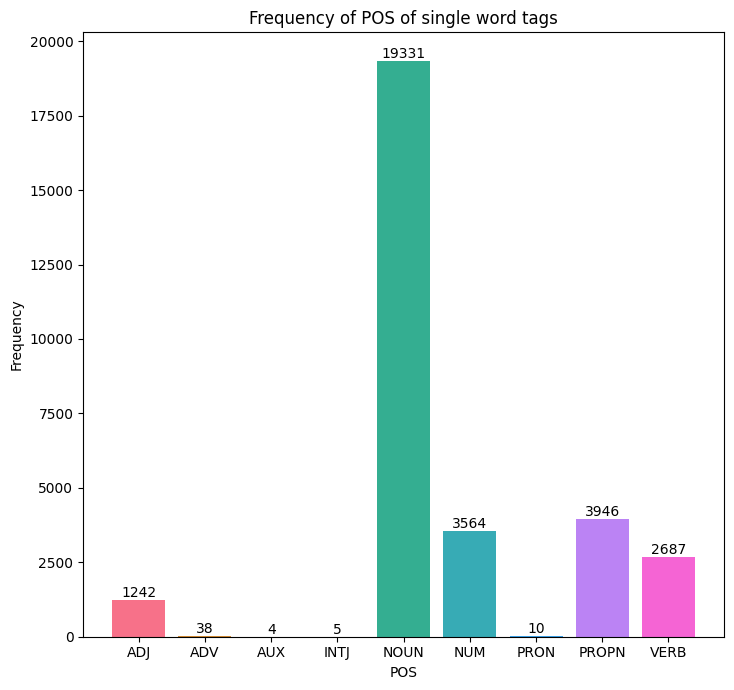

In [ ]:
# File path
single_word_file_path = "/content/drive/MyDrive/single_word_tags_with_pos.csv"

# Read the CSV file into a DataFrame
single_word_df = pd.read_csv(single_word_file_path)

# Group by 'POS' and calculate sum of 'Frequency' for each group
single_word_pos_summary = single_word_df.groupby('POS')['Frequency'].sum().reset_index()

# Calculate total frequency sum
total_sum = single_word_pos_summary['Frequency'].sum()

# Calculate percentage for each category
single_word_pos_summary['Percentage'] = (single_word_pos_summary['Frequency'] / total_sum) * 100

# Display the grouped and summarized data with percentages
print(single_word_pos_summary)

# Generate a list of colors
single_word_colors = sns.color_palette("husl", len(single_word_pos_summary))

# Create a color mapping based on single word tags POS
color_mapping = dict(zip(single_word_pos_summary['POS'], single_word_colors))

# Plotting
plt.figure(figsize=(14, 7))

# Bar Plot
plt.subplot(1, 2, 1)
bars = plt.bar(single_word_pos_summary['POS'], single_word_pos_summary['Frequency'], color=single_word_colors)
plt.xlabel('POS')
plt.ylabel('Frequency')
plt.title('Frequency of POS of single word tags')

# Add value labels on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

# Display the plots
plt.tight_layout()
plt.show()

The lexical frequencies of composite tags are summed up and percentages are calculated, and a visual bar chart is generated.

To ease comparison, the bar for composite tags is set to the same colour as single word tags.


In [ ]:
# import required libraries
import pandas as pd

      POS  Frequency  Percentage
0     ADJ       1025    3.083078
1     ADP        420    1.263310
2     ADV        126    0.378993
3    INTJ          6    0.018047
4    NOUN      22422   67.442700
5     NUM         49    0.147386
6  Others         58    0.174457
7   PROPN       2486    7.477591
8    VERB       6654   20.014438


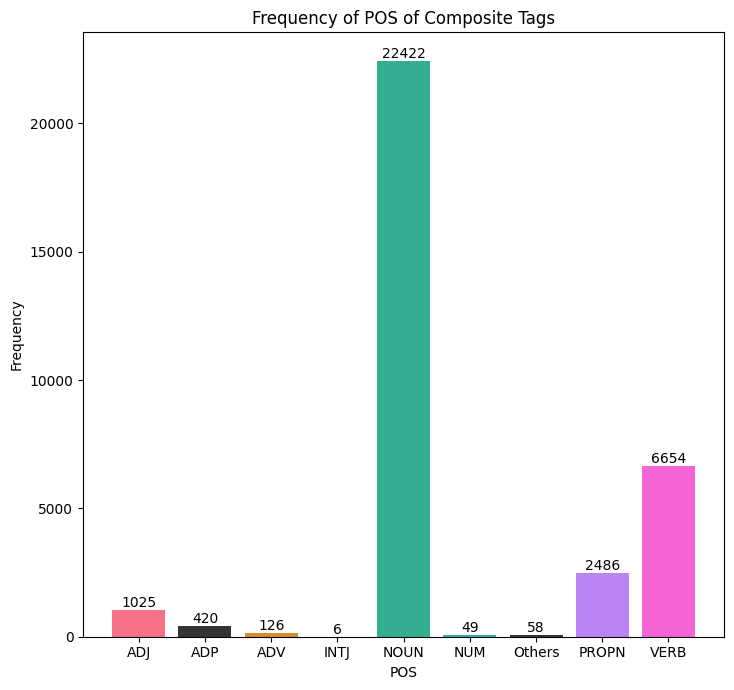

In [ ]:
# File path
composite_tags_file_path = "/content/drive/MyDrive/composite_tags_with_dependencies.csv"

# Read the CSV file into a DataFrame
composite_tags_df = pd.read_csv(composite_tags_file_path)

# Group by 'POS' and calculate sum of 'Frequency' for each group
composite_pos_summary = composite_tags_df.groupby('POS')['Frequency'].sum().reset_index()

# Calculate total frequency sum
total_sum = composite_pos_summary['Frequency'].sum()

# Calculate percentage for each category
composite_pos_summary['Percentage'] = (composite_pos_summary['Frequency'] / total_sum) * 100

# Display the grouped and summarized data with percentages
print(composite_pos_summary)

# Get the corresponding colors for composite tags based on the mapping
composite_colors = [color_mapping.get(pos, "#333333") for pos in composite_pos_summary['POS']]

# Plotting for composite tags
plt.figure(figsize=(14, 7))

# Bar Plot for composite tags
plt.subplot(1, 2, 1)
bars = plt.bar(composite_pos_summary['POS'], composite_pos_summary['Frequency'], color=composite_colors)
plt.xlabel('POS')
plt.ylabel('Frequency')
plt.title('Frequency of POS of Composite Tags')

# Add value labels on the bars for composite tags
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

# Display the plots for composite tags
plt.tight_layout()
plt.show()

### **Q4:What topics do these labels usually cover?**

The problem is solved as follows: (1). Label vectorisation: transform each label into a vector representation. (2). Category vectorisation: calculate the average vector of all labels in each category. (3). Similarity calculation: calculate the cosine similarity between the label vectors and each category vector to find the most similar category. (4). Label classification: Classify each label into the most similar category. (5). Result saving: save the labels and corresponding categories to a CSV file.

Here, we load the SentenceTransformer model 'all-MiniLM-L6-v2', which is used to transform text into vector embeddings.

Compared to other models (e.g. en_core_web_sm), Sentence-BERT is more good at handling text similarity tasks and can better capture the semantic relationships between tags. The model is used to convert each label and category into a vector representation, and then the similarity of each label to all categories is calculated to find the best matching category.

In [ ]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 5.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
# import required libraries
from sentence_transformers import SentenceTransformer
import pandas as pd
from scipy.spatial.distance import cosine
import numpy as np
import os

Formerly, by manually checking the tags, we divided them into 10 categories, they are: Year, Characters, Plot/Storyline, Author, Genre, Theme, Reading experience, Audience, Format, Attributes.

In [ ]:
# Load the pre-trained SentenceTransformer model 'all-MiniLM-L6-v2'
# This model is used for converting text into vector embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')

# Define a dictionary of categories with lists of tags related to each category
# This categorizes the tags into meaningful groups for better organization and retrieval
categories = {
    "Year": ["best-of-2023", "read-in-2023", "2023", "coming-soon", "2023-reads", "2024", "2023-releases", "2023-priority-releases", "2023-faves", "read-2023", "2023-top-ten", "best-books-of-2023", "pub-2023", "2022-favorites", "2023-best-reads", "2023-favourites", "2023-release", "2023-new-releases", "read-in-2023", "2023-reads", "faves-2023", "favourites-2023", "best-reads-of-24", "anticipated-releases", "2023-favorite-reads", "yearly-anticipated-2023"],
    "Characters": ["lgbtq", "badass-women", "queer-leads", "fiction-queer", "but-make-it-gay", "read-lgbtqia", "queer-reads", "lgbt", "female-protagonist", "badass-mcs", "lgbtq-fantasy-rep", "lgbtqia2s", "female-fronted-fantasy", "achillean-mc", "queer-fantasy"],
    "Plot/Storyline": ["arcs", "enemies-to-lovers", "arc", "family-dynamics", "adulting-is-hard", "all-parents-damage-their-children"],
    "Author": ["author-is-nice", "non-men-authors", "sapphic-characters-and-authors", "female-author"],
    "Genre": ["fantasy", "fiction-high-fantasy", "fantasy-game", "it's-a-kind-of-magic", "roman", "fantasy-dragons", "fiction", "china", "high-fantasy", "american-literature", "fantasy-read", "fantasy-favorites", "magic", "fiction-fantasy", "fiction-series", "f-novel", "fantasy-epic", "romance", "myth-fairy-tale-fantasy"],
    "Theme": ["sapphic", "achillean", "queer-themes","dragons-or-wyrms", "dragons",  "feminism", "ace-books", "bisexual-rep", "bi-rep", "apocalyptic", "2024-creatures-from-folklore-myth", "fantasy-heroic", "epic", "abandonado", "brujas-brujos-brujería", "aro-ace-aspec", "adventure", "coming-of-age", "lesbian", "sapphic-romance", "sapphic-fantasy", "mythical-beasties", "sapphic-girlies", "queer-romance", "lesbian-sff"],
    "Reading experience": ["fav-fantasy-books-i-recommend", "fantasy-recommendations", "sff-favorites", "published-tbr", "1-one-star-books", "beautiful-writing", "5-star", "favorites", "started-but-did-not-finish", "favorite-books", "wtf-am-i-reading", "all-time-favorites", "6-star-reads-books-of-my-life", "actual-tbr", "audiobook-tbr", "disappoiments", "bargain", "five-stars", "all-time-favorites", "best-fantasy", "4-25-stars",  "want-to-reread", "all-time-favs", "5-star-reads", "my-favorites", "4-stars","all-time-favs", "all-time-favorites", "favorites", "immersive", "to-buy", "4stars", "read-soon-or-unhaul", "favs", "want-to-reread", "chefs-kiss", "all-time-favorite-books", "re-readable"],
    "Audience": ["adult", "adult-fiction", "age-adult", "adult-fantasy-scifi", "read-adult", "adult-fantasy"],
    "Format": ["arcs-netgalley", "earc", "arc-s-netgalley-and-edelweiss", "arc-books", "netgalley", "physical-copy", "signed-special-edition", "a-r-c-or-review-copy", "audiobooks", "buddy-reads", "audio", "arc-copies", "arc-reviews", "ebooks-i-own", "audiobooks"],
    "Attributes": ["in-english", "english-read", "owned", "800-pages", "books-i-own", "on-my-bookshelf", "2023-owned-read", "owned-unread", "bought23"]
}

# Define a function to get the vector embedding of a given text
def get_vector(text):
    # Use the pre-trained model to convert the text into a numerical vector
    return model.encode(text)

# Calculate the average vector for each category based on its tags
# This creates a vector representation for each category by averaging the vectors of its tags
category_vectors = {cat: np.mean([get_vector(label) for label in labels], axis=0) for cat, labels in categories.items()}

# Define a function to find the best category for a given tag
def find_best_category(tag):
    # Get the vector embedding for the input tag
    # This converts the tag into a numerical vector for comparison
    tag_vec = get_vector(tag)

    # Initialize variables to store the best matching category and the highest similarity found
    # These will be used to track the most similar category and its similarity score
    best_category = None
    highest_similarity = -1

    # Iterate over each category and its vector in the category_vectors dictionary
    for category, category_vec in category_vectors.items():
        # Calculate the cosine similarity between the tag vector and the current category vector
        # Cosine similarity measures how similar two vectors are, with 1 being identical and 0 being orthogonal
        similarity = 1 - cosine(tag_vec, category_vec)

        # Check if the current similarity is higher than the highest similarity found so far
        if similarity > highest_similarity:
            # Update the highest similarity and the best matching category
            # This ensures we always keep the category with the highest similarity score
            highest_similarity = similarity
            best_category = category

    # Return the best matching category for the input tag
    # This function identifies the category that is most semantically similar to the given tag
    # This is necessary for categorizing tags based on their meanings and ensuring they are grouped correctly
    return best_category

# Define the input and output folder paths for the CSV files
# These paths specify where the input CSV files are located and where the output files should be saved
input_folder = '/content/drive/MyDrive/Page_5_tags'
output_folder = '/content/drive/MyDrive/Page_5_tags_category'

# Iterate over each file in the input folder
for file_name in os.listdir(input_folder):
    # Check if the file is a CSV file
    if file_name.endswith('.csv'):
        # Construct the full file path for the current file
        file_path = os.path.join(input_folder, file_name)
        # Read the CSV file into a DataFrame
        # This reads the CSV content into a pandas DataFrame for easier manipulation
        df = pd.read_csv(file_path)
        # Split the tags in the 'Tags' column and explode them into a list
        # This separates and flattens the tags into a single list
        tags = df['Tags'].apply(lambda x: x.split(';')).explode().tolist()

        # Initialize a set to store unique processed tags
        # This set will hold the individual tags after they have been processed (split and stripped).
        # Using a set ensures that each tag is stored only once, removing duplicates.
        processed_tags = set()

        # Iterate over each tag string in the list of tags
        for tag_string in tags:
            # Split the tag string by the delimiter '；' and strip any surrounding whitespace from each tag
            # This splits the concatenated tags into individual tags and removes any leading or trailing spaces.
            # Stripping whitespace is important for accurate comparison and categorization.
            individual_tags = [tag.strip() for tag in tag_string.split('；')]

            # Add the processed individual tags to the set
            # This adds the individual tags to the set, ensuring no duplicates and preserving unique tags.
            # Updating the set with new tags ensures that all tags from the current tag string are included.
            processed_tags.update(individual_tags)

        # Create a dictionary mapping each tag to its best category
        # This maps each processed tag to the most similar category
        tag_to_category = {tag: find_best_category(tag) for tag in processed_tags}

        # Create a DataFrame from the tag-to-category mapping
        # This converts the mapping to a DataFrame for saving
        output_df = pd.DataFrame(tag_to_category.items(), columns=['tag', 'category'])
        # Construct the output file path
        # This sets the path for the output CSV file
        output_csv_path = os.path.join(output_folder, file_name)
        # Save the DataFrame to a CSV file
        # This writes the DataFrame to a CSV file without including the index
        output_df.to_csv(output_csv_path, index=False)

        # Print a message indicating the result has been saved
        # This confirms the file has been saved
        print(f"the result has been saved to {output_csv_path}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


the result has been saved to /content/drive/MyDrive/Page_5_tags_category/reviews-four-masked-wolves_tag_count.csv
the result has been saved to /content/drive/MyDrive/Page_5_tags_category/reviews-captured-by-the-orc-general_tag_count.csv
the result has been saved to /content/drive/MyDrive/Page_5_tags_category/reviews-monster-lover_tag_count.csv
the result has been saved to /content/drive/MyDrive/Page_5_tags_category/reviews-the-last-one_tag_count.csv
the result has been saved to /content/drive/MyDrive/Page_5_tags_category/reviews-jade-shards_tag_count.csv
the result has been saved to /content/drive/MyDrive/Page_5_tags_category/reviews-magic-tides_tag_count.csv
the result has been saved to /content/drive/MyDrive/Page_5_tags_category/reviews-devil-s-gun_tag_count.csv
the result has been saved to /content/drive/MyDrive/Page_5_tags_category/reviews-claws-and-contrivances_tag_count.csv
the result has been saved to /content/drive/MyDrive/Page_5_tags_category/reviews-bones-of-the-lich-king_tag

**Reference**

spaCy. (n.d.). *Industrial-strength natural language processing in python*. Retrieved from https://spacy.io/
